<a href="https://colab.research.google.com/github/wnbrandao/wnbrandao/blob/main/Dados_de_cr%C3%A9dito_e_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [6]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [7]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [8]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Vendo o cliente com maior renda anual:


In [9]:
base_credit[base_credit['income']>=69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


Agora o cliente com menor dívida:

In [10]:
base_credit[base_credit['loan']<=1.377630	]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


Por fim, o cliente com menor renda anual:

In [11]:
base_credit[base_credit['income']<=20015.489470]

,clientid,income,age,loan,default
1452,1453,20014.48947,43.202204,2426.306223,0


*Nessa parte foi encontrado um erro, ainda não identificado na análise onde quando procuravamos o cliente com a income == 20014.489470, possívelmente por causa do 0 após o 7. Para contornar isso subi o valor de 1 dólar, de forma que continuásse a exibição apenas do cliente com menor renda.*

Analisando a proporção do gráfico (inadimplentes/adimplente):

In [12]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

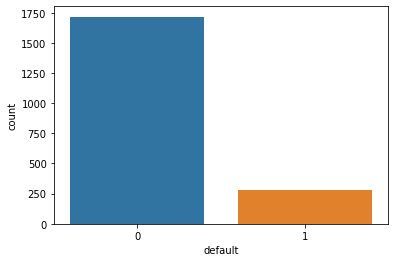

In [13]:
sns.countplot(x = base_credit['default'])

Quando exibimos a função describe encontramos desvios nos dados. Vamos tentar visualizar os pontos fora do padrão usando a função scatter_matrix do plotly.

In [14]:
grafico = px.scatter_matrix(base_credit, dimensions=['age','income','loan'], color='default')
grafico.show()

Fato interessante que surgiu: a maior concentração de pessoas devedoras está entre os 18 e 40 anos

Encontramos três idades negativas, erros, por definição. Tratando eles:

In [15]:
base_credit.loc[base_credit['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


localizamos as idades impossíveis

In [16]:
 base_credit_age_clear = base_credit.drop(base_credit[base_credit['age']<0].index)
base_credit_age_clear.describe()

,clientid,income,age,loan,default
count,1997.000000,1997.000000,1994.000000,1997.000000,1997.000000
mean,1001.970456,45326.596720,40.927700,4442.124566,0.141713
std,576.679293,14327.971550,13.271802,3045.494192,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.043284,1936.813257,0.000000
50%,1002.000000,45788.747100,41.382673,3971.155479,0.000000
75%,1501.000000,57787.565659,52.616900,6429.593688,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


criamos um dataset sem as idades e obtivemos a média (gerei outros dados caso sejam futuramente necessários)

In [17]:
base_credit.loc[base_credit['age']<0] = 40.927700

atribuimos a média dos valores limpos no lugar dos valores com erro

Foi encontrado um erro na operação, iremos subir novamente o DataSet e corrigir os erros (idades negativas) de outra forma


In [18]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [19]:
base_credit.head(27)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [20]:
base_credit.loc[base_credit['age']<0,'age']=40.92

In [21]:
base_credit.isnull().sum()


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [22]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


Inserindo a média nas idades null

In [23]:
base_credit['age'].fillna(base_credit['age'].mean(),inplace=True)

In [24]:
x_credit = base_credit.iloc[:,1:4].values

In [25]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [26]:
y_credit = base_credit.iloc[:,4].values

In [27]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
print(type(y_credit),type(x_credit))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [29]:
x_credit[:,0].min(),x_credit[:,1].min(),x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [30]:
x_credit[:,0].max(),x_credit[:,1].max(),x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

normalizando os valores:

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

Importaremos uma nova base de dados, com dados do censo.

In [32]:
base_census =pd.read_csv('/content/census.csv')


In [33]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
base_census.describe()


,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Verificando se existem campos vazios:

In [35]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [36]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

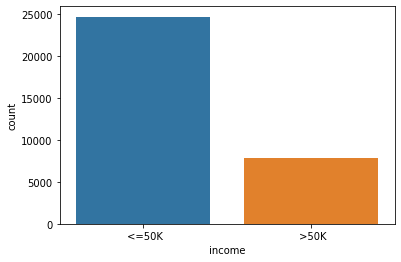

In [37]:
sns.countplot(x=base_census['income']);

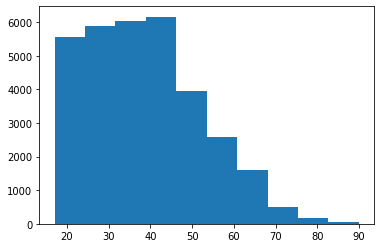

In [38]:
plt.hist(x=base_census['age']);

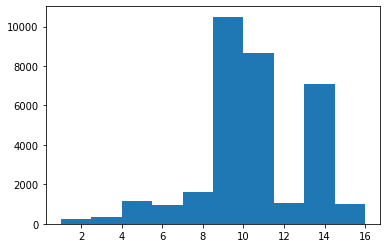

In [39]:
plt.hist(x=base_census['education-num']);

In [40]:
grafico = px.treemap(base_census,path=['workclass','age'])
grafico.show()

In [41]:
grafico = px.treemap(base_census,path=['workclass','income','education'])
grafico.show()

In [42]:
x_census=base_census.iloc[:,0:14].values

In [43]:
y_census=base_census.iloc[:,14].values

usar o label encoder

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [46]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_realtionship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [47]:
x_census[:,1]=label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3]=label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5]=label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6]=label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7]=label_encoder_realtionship.fit_transform(x_census[:,7])
x_census[:,8]=label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9]=label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13]=label_encoder_country.fit_transform(x_census[:,13])


In [48]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [49]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

usando o OneHotEncoder

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')

In [52]:
x_census=onehotencoder_census.fit_transform(x_census).toarray()

In [53]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [54]:
x_census.shape

(32561, 108)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [56]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [57]:
from sklearn.model_selection import train_test_split

<h2>Preditivo dos dados do dataset Credit_Data</h2>


In [58]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split (x_credit, y_credit, test_size = 0.25, random_state = 0)

In [59]:
x_credit_treinamento.shape

(1500, 3)

In [60]:
y_credit_treinamento.shape

(1500,)

In [61]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

<h2>Preditivo dos dados do dataset Census</h2>

In [62]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state=0)

In [63]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [64]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

<h2>Salvando as Bases de Dados<h2>

In [65]:
import pickle

In [66]:
with open('credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste],f)

In [67]:
with open('census.pkl',mode='wb')as f:
  pickle.dump([x_census_treinamento,y_census_treinamento,x_census_teste,y_census_teste], f)

<h2>

<h2>Implementando o Algoritmo de Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [70]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [71]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [72]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

<h2> usando o label encoder para transformar as variáveis categóricas em variáveis numéricas

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [74]:
x_risco_credito [:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito [:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito [:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito [:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [75]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [76]:
import pickle 
with open ('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito],f)

In [77]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

<h2> Algoritmo treinado, geramos uma previsão para avaliar o funcionamento

In [78]:
# historia boa(0), divida alta(0), garantia nula(1), renda >35(2)
# historia ruim(2), divida alta(0) , garatia boa(0), renda<15 (0)
previsao=naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

<h2> O risco de ambos os clientes condiz com os cálculos da função na tabela.

In [79]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [80]:
naive_risco_credito.class_count_, naive_risco_credito.class_prior_

(array([6., 5., 3.]), array([0.42857143, 0.35714286, 0.21428571]))

<h2> Agora pro Dataset credit_data.csv

In [81]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [82]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [83]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [84]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [85]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [86]:
from sklearn.metrics import accuracy_score, classification_report

In [87]:
accuracy_score(y_credit_teste, previsoes)

0.938

<h2>93% de acertos

0.938

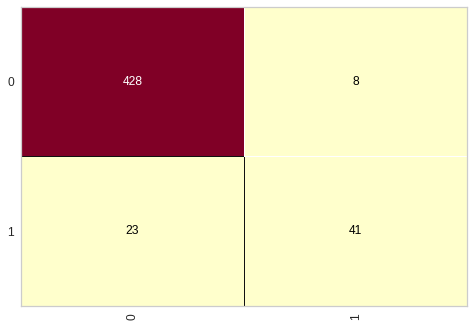

In [88]:
from yellowbrick.classifier import ConfusionMatrix
cm=ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [89]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



<h2>Por fim, vamos pra census.csv:

In [90]:
with open ('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [91]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [92]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

<h2> Nesse caso a taxa de acerto é menor que 50%, se gerássemos os números aleatórios teríamos maior acertabilidade.

<h1> Vamos Agora conhecer o algoritmo de Árvore de decisão.

<h3> Para a Base risco de crédito:

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
import pickle
with open ('risco_credito.pkl','rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [95]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [96]:
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [97]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

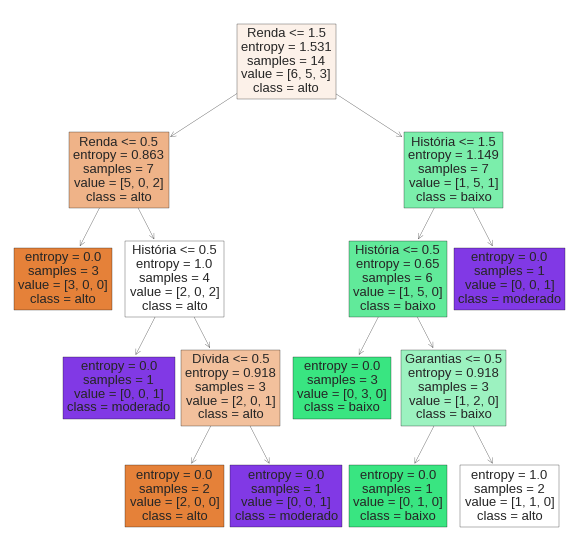

In [98]:
from sklearn import tree
previsores = ['História', 'Dívida', 'Garantias', 'Renda']
figura, eixos = plt.subplots(nrows = 1, ncols= 1, figsize = (10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= arvore_risco_credito.classes_, filled=True);

In [99]:
# historia boa(0), divida alta(0), garantia nula(1), renda >35(2)
# historia ruim(2), divida alta(0) , garatia boa(0), renda<15 (0)
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

<h2> Aplicando a arvore de decisão na base de crédito

In [100]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [101]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [102]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [103]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [104]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

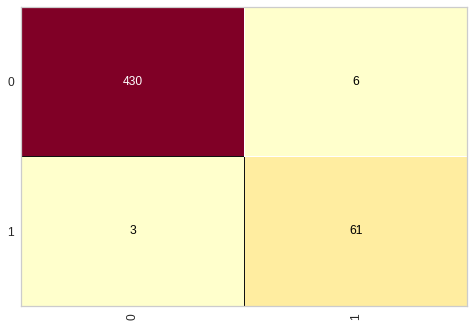

In [107]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [108]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



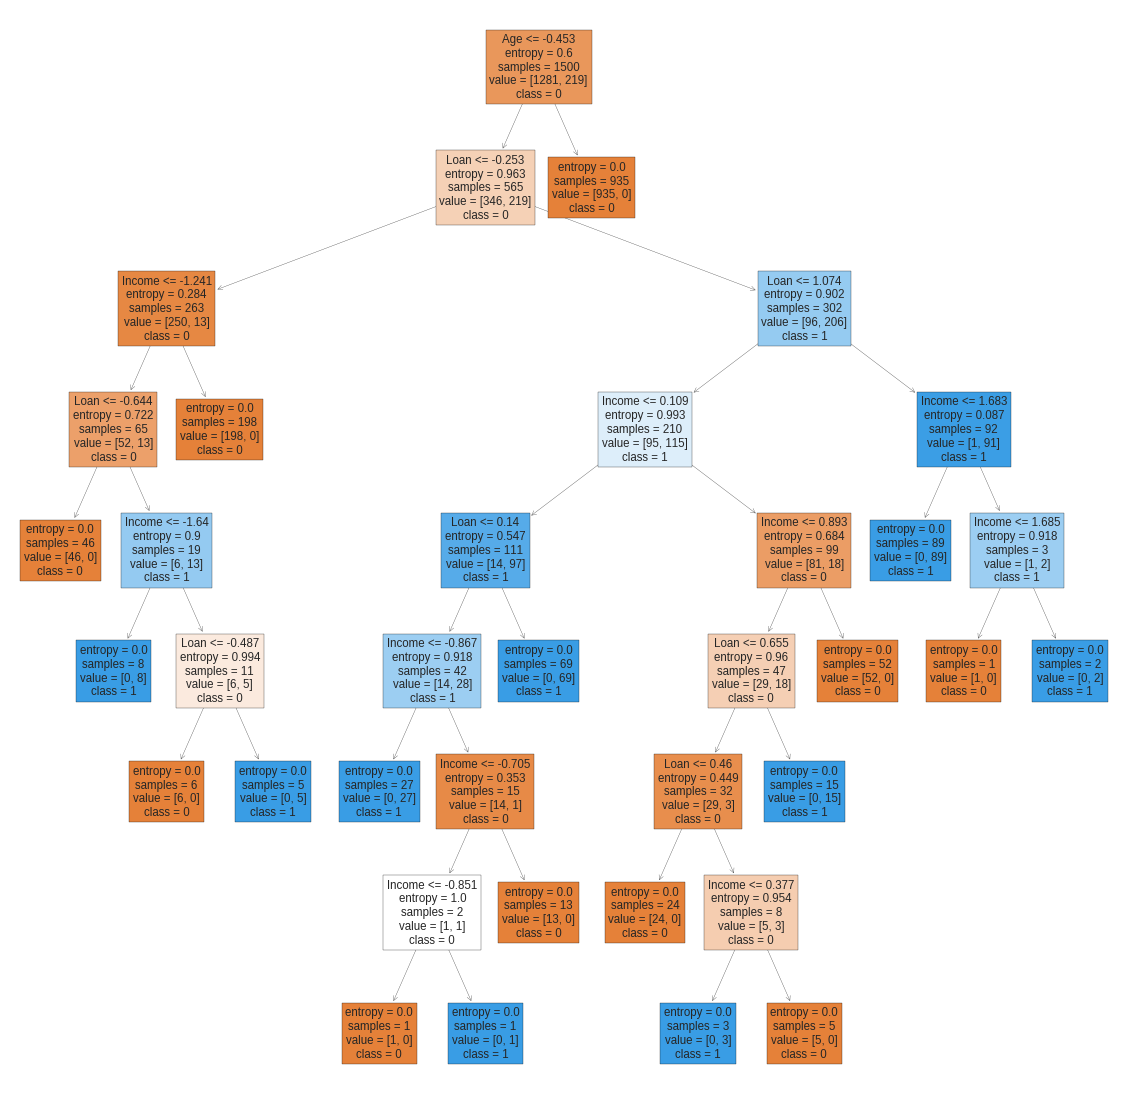

In [109]:
from sklearn import tree
previsores = ['Income', 'Age', 'Loan']
figura, eixos = plt.subplots(nrows = 1, ncols= 1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names= ['0','1'], filled=True);

<h2> Agora com a Base Census:

In [110]:
with open ('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [111]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [112]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [113]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [114]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [115]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [116]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

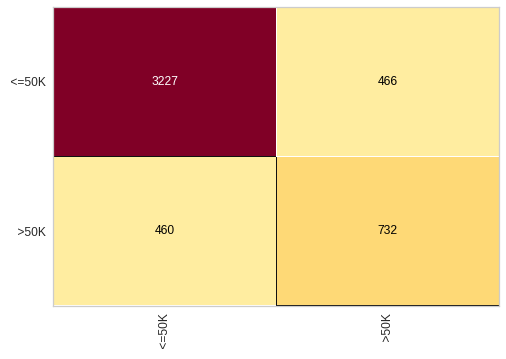

In [117]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [118]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



<h2> Aplicando Random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

<h2> Credit Data


In [120]:
with open ('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [121]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [122]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [123]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state= 0)
random_forest_credit.fit(x_credit_treinamento,y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [124]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

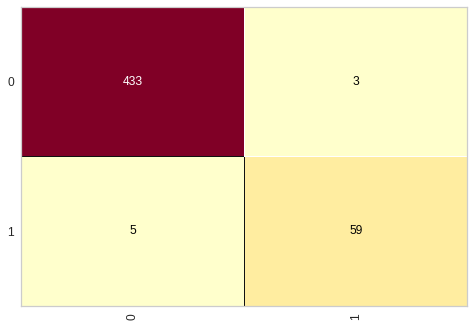

In [127]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [128]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



<h2> Base Census

In [129]:
with open ('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [130]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [131]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [132]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state= 0)
random_forest_census.fit(x_census_treinamento,y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [133]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [134]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

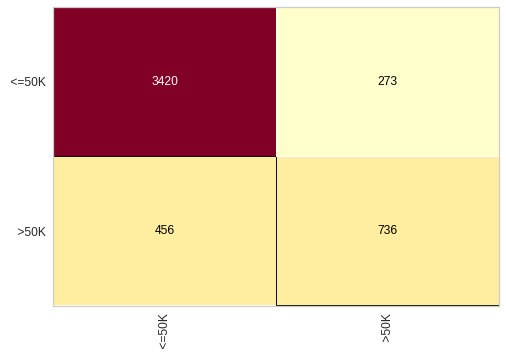

In [135]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [136]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



<h2> Trabalhando com as Regras

In [137]:
!pip install Orange3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.0 MB 192 kB/s 
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
     |████████████████████████████████| 53 kB 1.0 MB/s 
     |████████████████████████████████| 230 kB 40.0 MB/s 
     |████████████████████████████████| 149 kB 37.6 MB/s 
     |████████████████████████████████| 492 kB 47.1 MB/s 
     |████████████████████████████████| 8.4 MB 20.1 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 332 kB 34.2 MB/s 
     |████████████████████████████████| 253 kB 40.8 MB/s 
     |████████████████████████████████| 2.5 MB 32.9 MB/s 
     |████████████████████████████████| 992 kB 21.6 MB/s 
     |████████████████████████████████| 68 kB 4.0 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 5

In [138]:
import Orange

<h2> Base Risco de credito

In [139]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



In [140]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [141]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [142]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [143]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [144]:
# historia boa(0), divida alta(0), garantia nula(1), renda >35(2)
# historia ruim(2), divida alta(0) , garatia boa(0), renda<15 (0)
previsoes = regras_risco_credito([['boa','alta','nenhuma','acima_35'],['ruim','alta','adequada','0_15']])


In [145]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


<h2> Base Credit Data

In [146]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [147]:
base_credit.domain

[income, age, loan | default]

In [148]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [149]:
base_treinamento = base_dividida[1]

In [150]:
base_teste = base_dividida[0]

In [151]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [152]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [153]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF income>=69478.3987640403 THEN default=1 
IF age>=34.915516287554105 THEN default=1 
IF age>=34.851817262359 THEN default=0 
IF income>=68811.7794157006 THEN default=0 
IF age>=34.7514377613552 THEN default=1 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND age>=18.1760434475727 THEN default=1 
IF income>=57596.3540980592 THEN default=0 
IF loan>=5836.56338145928 AND age>=29.4230185477063 THEN default=1 
IF loan>=5836.56338145928 AND age>=29.417216334492 THEN default=0 
IF loan>=5836.56338145928 AND loan>=6289.25607587104 THEN default=1 
IF income>=34145.7995516248 AND income>=50360.6787929311 THEN default=0 
IF loan>=5836.56338145928 THEN default=1 
IF income<=33489.0398592688 AND loan>=3665.88089899456 THEN default=1 
IF age>=33.0311115211807 THEN default=0 
IF income>=26617.0303151011 AND income>=45971.133494749694 THEN default=0 
IF loan>=5502.73603087282 THEN default=1 
IF income>=26617

In [154]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [155]:
Orange.evaluation.CA(previsoes)

array([0.98])